In [6]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')

Saving Student_Satisfaction_Survey.csv to Student_Satisfaction_Survey.csv
User uploaded file "Student_Satisfaction_Survey.csv" with length 94977 bytes


In [20]:
import pandas as pd
df = pd.read_csv("Student_Satisfaction_Survey.csv", encoding='latin1')
df.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [24]:
df.columns

Index(['SN', 'Total Feedback Given', 'Total Configured', 'Questions',
       'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4',
       'Weightage 5', 'Average/ Percentage', 'Course Name ', 'Basic Course'],
      dtype='object')

### **Brief Dataset Information: **
This is the dataset including the aggrigated students feedback of many google forms response.

*   The Total Configured	column is the total no of studemts who were eligible

*   Total feedback given shows total form response
*   Question is the column with the qn that shows what qn was asked to those students.
*   Weightage 1 to weightage 5 are the columns showing no of students who rated 1/2/3/4/5 out of 5.
*   Average = (1×W1+2×W2+3×W3+4×W4+5×W5)/ Total feedback given
*   Percentage = avg/5 *100%
- Cource name and basic course shows subject and the course category respectively.


In [25]:
df.isnull().sum()

,0
SN,0
Total Feedback Given,0
Total Configured,0
Questions,0
Weightage 1,0
Weightage 2,0
Weightage 3,0
Weightage 4,0
Weightage 5,0
Average/ Percentage,0


In [26]:
df.sample(5)

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
261,2,14,44,How well did the teachers prepare for the clas...,1,1,3,7,2,3.57 / 71.43,MSC ANALYTICAL CHEMISTRY SEM III,MSC ANALYTICAL CHEMISTRY
417,18,46,137,Efforts are made by the institute/ teachers to...,1,3,1,25,16,4.13 / 82.61,S.Y.B.A.F,BACHELOR OF COMMERCE (ACCOUNTING AND FINANCE)
33,14,1,144,Teachers are able to identify your weaknesses ...,0,0,0,0,1,5.00 / 100.00,FYBA,BACHELOR OF ARTS
46,7,74,119,The institute takes an active interest in prom...,2,6,22,10,34,3.92 / 78.38,FY BCOM (ACCOUNTING & FINANCE),BACHELOR OF COMMERCE (ACCOUNTING AND FINANCE)
490,11,27,48,Your mentor does a necessary follow-up with an...,0,6,9,8,4,3.37 / 67.41,SY COMPUTER SCIENCE,B.SC. COMPUTER SCIENCE


In [31]:
df.dtypes

,0
SN,int64
Total Feedback Given,int64
Total Configured,int64
Questions,object
Weightage 1,int64
Weightage 2,int64
Weightage 3,int64
Weightage 4,int64
Weightage 5,int64
Average/ Percentage,object


In [32]:
num_unique_questions = df['Questions'].nunique()
print(f"Number of unique questions: {num_unique_questions}")

Number of unique questions: 20


In [34]:
df['avg_rating'] = df['Average/ Percentage'].apply(lambda x: float(x.split('/')[0].strip()))
df.sample()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course,avg_rating
495,16,27,48,The institute/ teachers use student-centric me...,2,6,9,5,5,3.19 / 63.70,SY COMPUTER SCIENCE,B.SC. COMPUTER SCIENCE,3.19


In [38]:
# make a data of two columns including questions and the mean rating in each questions
df.groupby("Questions")["avg_rating"].mean().sort_values(ascending=False)

,avg_rating
Questions,
Fairness of the internal evaluation process by the teachers.,4.215517
How well were the teachers able to communicate?,4.197241
How well did the teachers prepare for the classes?,4.090000
The teachers illustrate the concepts through examples and applications.,4.067241
"Teachers inform you about your expected competencies, course outcomes and program\noutcomes.",3.979655
How much of the syllabus was covered in the class?,3.953103
Was your performance in assignments discussed with you?,3.910345
Teachers encourage you to participate in extracurricular activities.,3.900690
"Efforts are made by the institute/ teachers to inculcate soft skills, life skills and employability skills to make you ready for the world of work.",3.853103


In [40]:
# since there is no column contyaining text esponse of the students we cant use textblob for sentiment analysis and NLP is not applicable here so we can divide based on the average rating on that specific question.

# Define a function to categorize average ratings into sentiments
def categorize_sentiment(rating):
    if rating >= 3.5:
        return 'Positive'
    elif rating <= 2.5:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create a new 'sentiment' column
df['sentiment'] = df['avg_rating'].apply(categorize_sentiment)

# Display the count of each sentiment category
display(df['sentiment'].value_counts())

,count
sentiment,
Positive,442
Neutral,120
Negative,18


<Axes: xlabel='sentiment'>

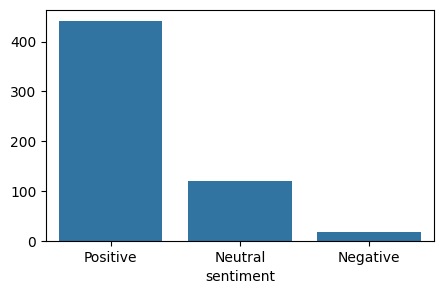

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
# Count the occurrences of each sentiment category
sentiment_counts = df['sentiment'].value_counts()
# Create a bar plot
plt.figure(figsize=(5, 3))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)

In [42]:
df.groupby('Questions')['sentiment'].value_counts()

Questions                                                                                                                                                                         sentiment
Efforts are made by the institute/ teachers to inculcate soft skills, life skills and employability skills to make you ready for the world of work.                               Positive     23
                                                                                                                                                                                  Neutral       5
                                                                                                                                                                                  Negative      1
Fairness of the internal evaluation process by the teachers.                                                                                                                      Positive     27
                                                                                                                                                                                  Neutral       2
How much of the syllabus was covered in the class?                                                                                                                                Positive     24
                                                                                                                                                                                  Neutral       5
How well did the teachers prepare for the classes?                                                                                                                                Positive     28
                                                                                                                                                                                  Neutral       1
How well were the teachers able to communicate?                                                                                                                                   Positive     25
                                                                                                                                                                                  Neutral       4
Teachers are able to identify your weaknesses and help you to overcome them.                                                                                                      Positive     19
                                                                                                                                                                                  Neutral       9
                                                                                                                                                                                  Negative      1
Teachers encourage you to participate in extracurricular activities.                                                                                                              Positive     26
                                                                                                                                                                                  Neutral       3
Teachers inform you about your expected competencies, course outcomes and program\noutcomes.                                                                                      Positive     22
                                                                                                                                                                                  Neutral       7
The institute takes an active interest in promoting internships, student exchange, field visit opportunities for students.                                                        Positive     20
                                                                                                                              

/tmp/ipython-input-2141930839.py:15: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2141930839.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1500x1000 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


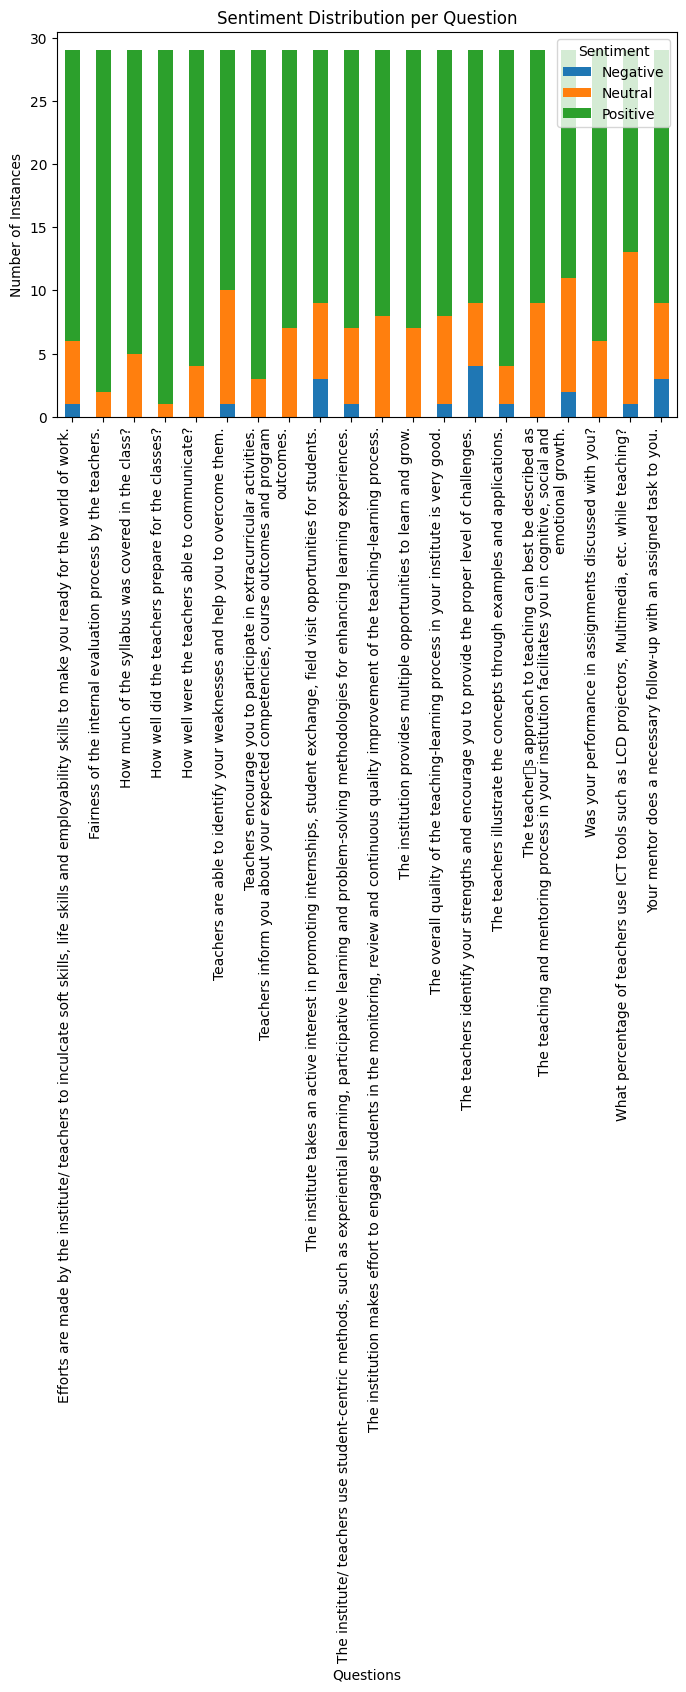

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the sentiment counts grouped by question and unstack for plotting
sentiment_by_question = df.groupby('Questions')['sentiment'].value_counts().unstack(fill_value=0)

# Plot a stacked bar chart
plt.figure(figsize=(15, 10))
sentiment_by_question.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Sentiment Distribution per Question')
plt.xlabel('Questions')
plt.ylabel('Number of Instances')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


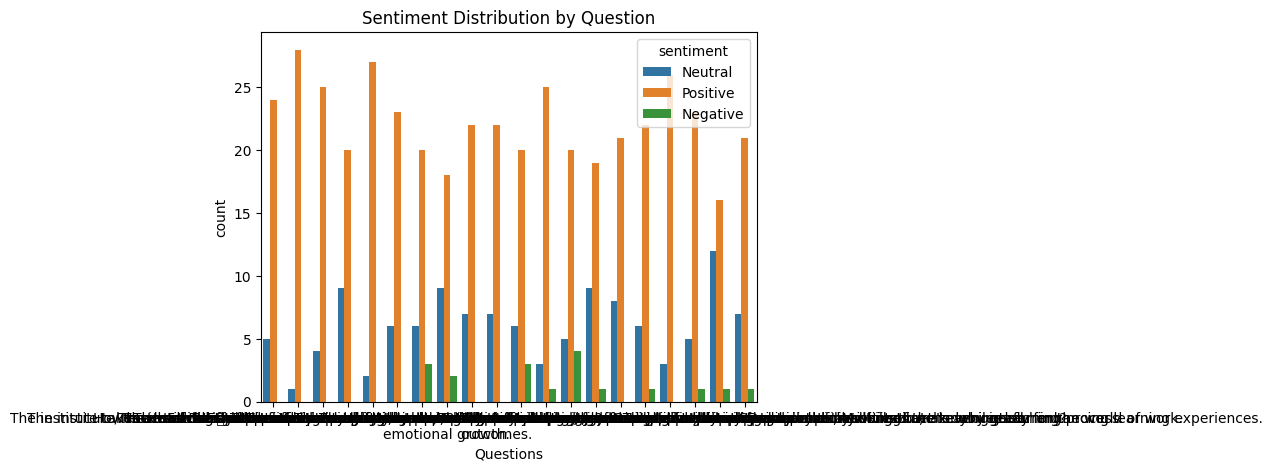

In [76]:
sns.countplot(data=df, x='Questions', hue='sentiment')
plt.title("Sentiment Distribution by Question")
plt.show()

In [51]:
df.groupby('Course Name ')['sentiment'].value_counts()

Course Name                       sentiment
FY B.VOC FOOD TECHNOLOGY          Neutral       9
                                  Positive      8
                                  Negative      3
FY BCOM (ACCOUNTING & FINANCE)    Positive     19
                                  Neutral       1
FY BCOM (BANKING & INSURANCE)     Positive     20
FYBA                              Positive     19
                                  Neutral       1
FYBMS                             Positive     20
FYBSC                             Positive     18
                                  Negative      1
                                  Neutral       1
M.SC PART - 1 COMPUTER SCIENCE    Positive     11
                                  Neutral       7
                                  Negative      2
M.SC PART - 2 COMPUTER SCIENCE    Positive     19
                                  Neutral       1
MA PSYCHOLOGY - 1                 Positive     14
                                  Neutral       6
MA PSYCHOLOGY - 3                 Positive     11
                                  Neutral       8
                                  Negative      1
MSC ANALYTICAL CHEMISTRY SEM I    Positive     20
MSC ANALYTICAL CHEMISTRY SEM III  Positive     12
                                  Neutral       8
MSC DATA SCIENCE - 1              Neutral      12
                                  Negative      5
                                  Positive      3
MSC DATA SCIENCE - 3              Positive     10
                                  Neutral       8
                                  Negative      2
MSC INFORMATION TECHNOLOGY - 1    Positive     20
MSC INFORMATION TECHNOLOGY - 3    Positive     19
                                  Neutral       1
MSC MICROBIOLOGY - 1              Neutral      12
                                  Positive      8
MSC MICROBIOLOGY - 3              Positive     18
                                  Neutral       2
MSC ORGANIC CHEMISTRY - 3         Positive     19
                                  Neutral       1
MSC PHYSICS - 3                   Positive     12
                                  Neutral       5
                                  Negative      3
S.Y.B.A.F                         Positive     19
                                  Neutral       1
SY COMPUTER SCIENCE               Neutral      15
                                  Positive      5
SYBCOM                            Positive     19
                                  Neutral       1
SYBMS                             Positive     20
SYBSC                             Neutral      17
                                  Positive      3
TYBA                              Positive     20
TYBCOM                            Positive     18
                                  Neutral       2
TYBMS                             Positive     18
                                  Negative      1
                                  Neutral       1
TYBSC                             Positive     20
Name: count, dtype: int64

In [53]:
df.groupby('Basic Course')['sentiment'].value_counts()

Basic Course                                   sentiment
B.SC. COMPUTER SCIENCE                         Neutral      15
                                               Positive      5
B.VOC FOOD TECHNOLOGY                          Neutral       9
                                               Positive      8
                                               Negative      3
BACHELOR OF ARTS                               Positive     39
                                               Neutral       1
BACHELOR OF COMMERCE                           Positive     37
                                               Neutral       3
BACHELOR OF COMMERCE (ACCOUNTING AND FINANCE)  Positive     38
                                               Neutral       2
BACHELOR OF COMMERCE (BANKING AND INSURANCE)   Positive     20
BACHELOR OF MANAGEMENT STUDIES                 Positive     58
                                               Negative      1
                                               Neutral       1
BACHELOR OF SCIENCE                            Positive     41
                                               Neutral      18
                                               Negative      1
MA PSYCHOLOGY                                  Positive     25
                                               Neutral      14
                                               Negative      1
MSC ANALYTICAL CHEMISTRY                       Positive     32
                                               Neutral       8
MSC COMPUTER SCIENCE                           Positive     30
                                               Neutral       8
                                               Negative      2
MSC DATA SCIENCE                               Neutral      20
                                               Positive     13
                                               Negative      7
MSC INFORMATION TECHNOLOGY                     Positive     39
                                               Neutral       1
MSC MICROBIOLOGY                               Positive     26
                                               Neutral      14
MSC ORGANIC CHEMISTRY                          Positive     19
                                               Neutral       1
MSC PHYSICS                                    Positive     12
                                               Neutral       5
                                               Negative      3
Name: count, dtype: int64

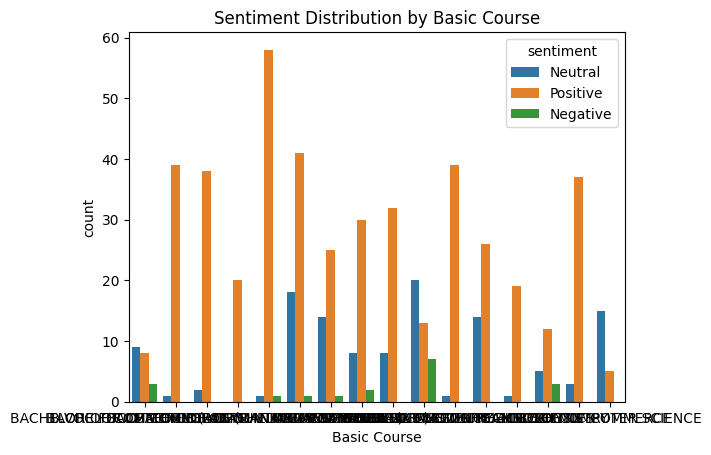

In [75]:
sns.countplot(data=df, x='Basic Course', hue='sentiment')
plt.title("Sentiment Distribution by Basic Course")

plt.show()

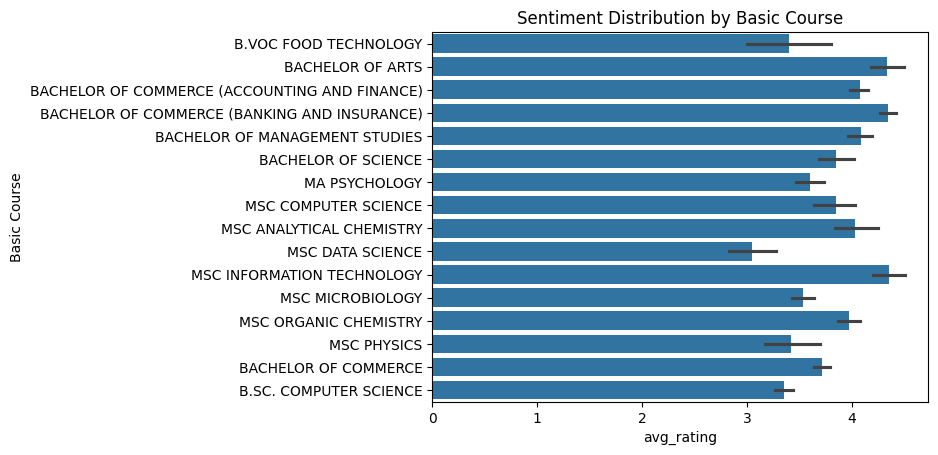

In [77]:
sns.barplot(data=df, x='avg_rating', y= 'Basic Course')
plt.title("Sentiment Distribution by Basic Course")

plt.show()

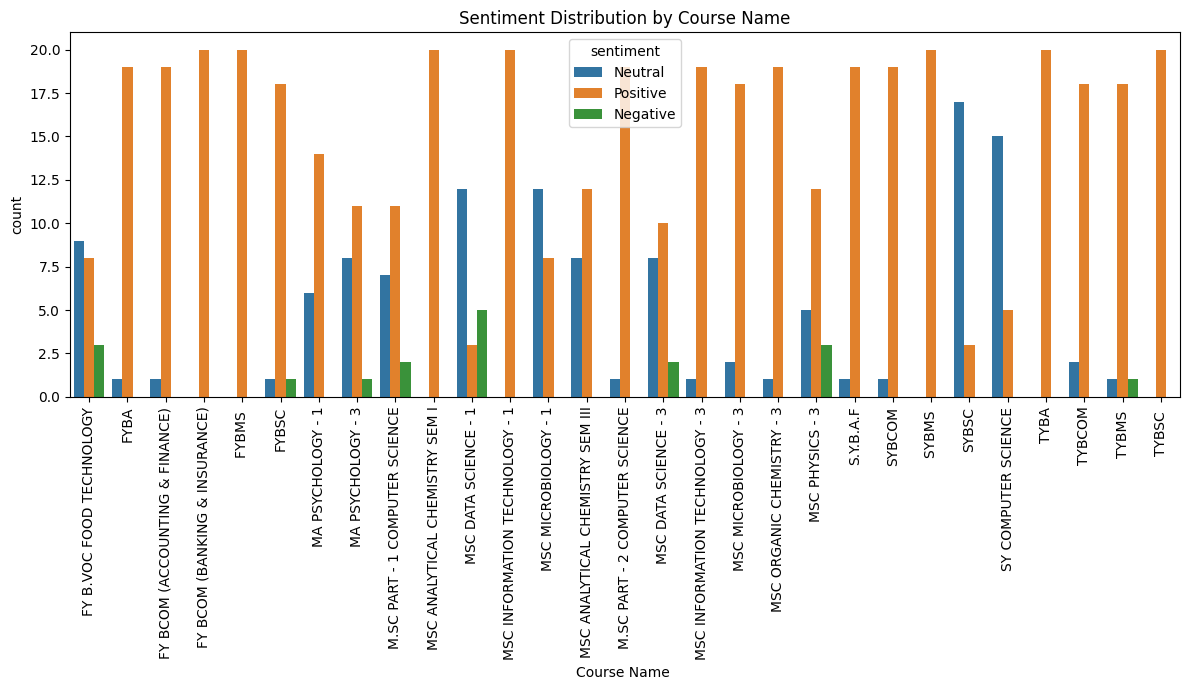

In [65]:

plt.figure(figsize=(12,7))
sns.countplot(x="Course Name ", hue="sentiment", data=df)
plt.title("Sentiment Distribution by Course Name")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

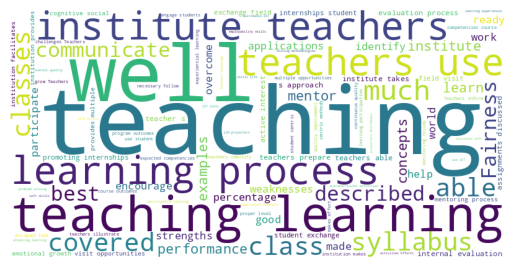

In [66]:
from wordcloud import WordCloud

text = " ".join(df["Questions"])

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()